**B1**

Коцевич Андрей, Б02-920

In [164]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

**1.** Реализовать генератор матриц, который должен поддерживать функции:
* Генерация абсолютно случайной матрицы $n\times m$
* Генерация случайной диагональной матрицы $n\times n$
* Генерация случайной верхнетреугольной матрицы
* Генерация случайной нижнетреугольной матрицы
* Генерация симметричной матрицы
* Генерация вырожденной матрицы
* Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$

Оценить вероятность того, что созданная матрица будет вырожденной. 

Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).

In [66]:
min = -100
max = 100
def generate_matrix(n, m): #случайная матрица размера n*m
    return np.random.uniform(min, max, size=[n, m])
def generate_diagonal(n): #случайная диагональная матрица размера n*n
    return np.diag(np.random.uniform(min, max, size=[n]))
def generate_upper_triangular(n): #случайная верхнетреугольная матрица размера n*n
    return np.triu(generate_matrix(n, n))
def generate_lower_triangular(n): #случайная нижнетреугольная матрица размера n*n
    return np.tril(generate_matrix(n, n))
def generate_sym(n): #симметричная матрица размера n*n
    A = generate_matrix(n, n)
    return (A + A.T)
def generate_singular(n): #сингулярная матрица
    if n==1:
      return np.array([[0]])
    M = generate_matrix(n,n)
    M[1]=M[0] #дублируем 1 строку
    return M
def generate_ladder(n, m): #матрица ступенчатого вида n*n ранга m
    M = generate_upper_triangular(n)
    M[m:]=0 #обнуление n-m последних строчек
    return M
def generate_perturbation(n, m, eps): #вощмущение матрицы n*m
    return np.random.uniform(-eps, eps, size=[n, m])

In [ ]:
generate_matrix(2,3)

array([[-14.39531638, -99.68469224,  49.0505597 ],
       [-33.76831201,  22.84093309,  91.31402338]])

In [ ]:
generate_diagonal(4)

array([[-44.66456809,   0.        ,   0.        ,   0.        ],
       [  0.        ,  12.85282254,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.37499626,   0.        ],
       [  0.        ,   0.        ,   0.        , -25.99577081]])

In [ ]:
generate_upper_triangular(4)

array([[-61.42787039, -25.80331546,  80.44763342, -98.95039502],
       [  0.        ,  16.14637316,  89.10028668,  87.948529  ],
       [  0.        ,   0.        ,  80.03537172,  48.26113136],
       [  0.        ,   0.        ,   0.        ,  29.36995361]])

In [ ]:
generate_lower_triangular(4)

array([[ 50.95983444,   0.        ,   0.        ,   0.        ],
       [ -4.82163312, -10.96556405,   0.        ,   0.        ],
       [-88.08226724, -15.08128599, -97.14573008,   0.        ],
       [ 70.14584225,  79.97490498,  22.20869804, -99.96846272]])

In [ ]:
generate_sym(1)

array([[78.44564247]])

In [ ]:
generate_singular(3)

array([[ -2.60181421, -56.63847476, -93.80025368],
       [ -2.60181421, -56.63847476, -93.80025368],
       [-31.70730769, -43.31688896, -99.5345433 ]])

In [ ]:
generate_ladder(4,2)

array([[  3.21152728,  82.98798905,  87.49382198, -91.9211272 ],
       [  0.        ,  50.90177984,  71.03637699, -26.11558011],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [ ]:
generate_perturbation(2,3,0.05)

array([[-0.0432777 ,  0.03592156, -0.03458776],
       [ 0.00761801, -0.01764704,  0.0161353 ]])

In [ ]:
eps = 0.1
N = 500
l2 = np.zeros(N)
for i in range(N):
    n = 10
    A = generate_perturbation(n, n, eps)
    l2[i] = (np.amax(np.linalg.eigvals(A.T @ A)))**0.5
print(l2.mean()/eps)

3.170572488740968


Как видно, в среднем $l_2$-норма втрое превышает eps.

**2.** Используя ряд Маклорена, реализовать вычисление основных элементарных функций: 
* Экспонента
* Натуральный логарифм
* Синус
* Косинус
* Тангенс
* Котангенс
* Арксинус
* Арккосинус
* Арктангенс
* Гиперболический синус 
* Гиперболический косинус
* Гиперболический тангенс
* Гиперболический арктангенс

Оценить величину машинного эпсилон. Предложить модификации для некоторых функций и сравнить полученные результаты.

In [55]:
def exp(x): #вычисление экспоненты
  sum = 0
  term = 1
  i = 1
  while sum != sum + term:
    sum += term
    term = term * abs(x)/i
    i += 1
  if sum != 0: print(f"eps = {term/sum}")
  if x < 0: sum = 1/sum
  return sum
exp(1), exp(2), exp(5)

eps = 5.745985131144598e-17
eps = 4.391435496532488e-17
eps = 9.033416751357898e-17


(2.7182818284590455, 7.389056098930649, 148.41315910257654)

In [58]:
def ln(x): #вычисление логарифма
  x -= 1
  sum = 0
  term = x
  i = 1
  while sum != sum + term:
    sum += term
    term = -term *x*i/(i+1)
    i += 1
  if sum != 0: print(f"eps = {term/sum}")
  return sum
ln(1.05), ln(0.5), ln(1.5)

eps = 1.9245731590189378e-17
eps = 5.2300840878610914e-17
eps = -4.381035023428893e-17


(0.04879016416943205, -0.6931471805599451, 0.4054651081081643)

In [60]:
def sin(x): #вычисление синуса
  sum = 0
  term = x
  i = 3
  while sum != sum + term:
    sum += term
    term = -term *x*x/(i*(i-1))
    i += 2
  if sum != 0: print(f"eps = {term/sum}")
  return sum
sin(0.1), sin(1), sin(np.pi)

eps = -2.5093910663266542e-18
eps = -9.769362693475473e-18
eps = 8.376287306418679e-19


(0.09983341664682817, 0.8414709848078965, 2.348988252873668e-16)

In [61]:
def cos(x): #вычисление косинуса
  sum = 0
  term = 1
  i = 2
  while sum != sum + term:
    sum += term
    term = -term *x*x/(i*(i-1))
    i += 2
  if sum != 0: print(f"eps = {term/sum}")
  return sum
cos(0.1), cos(1), cos(np.pi)

eps = -2.769568227514484e-17
eps = 7.607440461887061e-19
eps = 3.0962506152968605e-18


(0.9950041652780258, 0.5403023058681397, -1.0000000000000002)

In [ ]:
def tan(x): #вычисление синуса
  sum = 0
  term = x
  i = 3
  while sum != sum + term:
    sum += term
    term = -term *x*x/(i*(i-1))
    i += 2
  return sum
sin(np.pi)

**3.** Реализовать вычисление трех основных норм векторов ($L_1$, $L_2$ и кубическую) и подчиненных им матричных норм. Реализовать вычисление числа обусловленности.

Примечание: для вычисления собственных значений можно использовать linalg.eigvals из модуля scipy

In [12]:
def L1_vec(v): #векторная L1-норма
    return np.sum(np.abs(v))
def L2_vec(v): #векторная L2-норма
    return (np.sum(v*v))**0.5
def Cube_vec(v): #векторная кубическая норма
    return np.max(np.abs(v))

v = np.array([1, -2, 5])
L1_vec(v), L2_vec(v), Cube_vec(v)

(8, 5.477225575051661, 5)

In [37]:
def L1_mat(M): #матричная L1-норма
    return np.max(np.sum(np.abs(M), axis=0))
def L2_mat(M): #матричная L2-норма
    w, v = scipy.linalg.eig(M.T @ M)
    return (np.max(np.abs(w)))**0.5
def Cube_mat(M): #матричная кубическая норма
    return np.max(np.sum(np.abs(M), axis=1))    

M = np.array([[1, 1],[2, 5]])
L1_mat(M), L2_mat(M), Cube_mat(M)

(6, 5.54138126514911, 7)

In [38]:
def condition_number(M): #число обусловленности матрицы (по евклидовой норме)
  return L2_mat(M)*L2_mat(np.linalg.inv(M))

M = np.array([[1, 1],[2, 5]])
condition_number(M)

10.235635441915182

**4.** Реализовать метод Гаусса приведения матрицы к ступенчатому виду. Реализовать функцию вычисления ранга матрицы. Сгенерировать вырожденные матрицы различных рангов и размеров и проверить алгоритм.

In [92]:
def gauss1(M): #1 часть метода Гаусса
    n, m = M.shape
    k = 0
    for i in range(m):
        l = -1
        for j in range(k, n):
            if M[j, i] != 0:
                l = j
                break
        if l != -1:
            M[[k, l]] = M[[l, k]]
        else:
            continue
        for j in range(k + 1, n):
            M[j] = M[j] - M[k] / M[k, i] * M[j, i]
        k += 1
    return M
def rang(M): #вычисление ранга
    return np.sum(np.any(gauss1(M), axis=1))

In [93]:
M = generate_singular(2)
print(M)
print(gauss1(M), rang(M))

[[-58.52464087  88.88535668]
 [-58.52464087  88.88535668]]
[[-58.52464087  88.88535668]
 [  0.           0.        ]] 1


In [94]:
M = generate_singular(3)
print(M)
print(gauss1(M), rang(M))

[[23.77807481 65.73507132 15.2157494 ]
 [23.77807481 65.73507132 15.2157494 ]
 [ 5.63131432 -5.80862611  1.32514809]]
[[ 2.37780748e+01  6.57350713e+01  1.52157494e+01]
 [ 0.00000000e+00 -2.13765327e+01 -2.27836768e+00]
 [ 0.00000000e+00  0.00000000e+00  1.77635684e-15]] 3


**5.** Реализовать метод Гаусса решения СЛАУ. Использовать данный метод для решения систем различных размеров. Оценить скорость работы метода Гаусса (необходимое количество операций) в зависимости от размера системы. 

In [107]:
def gauss(M, f): #2 часть метода Гаусса
    f = np.array(f, dtype='float')
    f = f.reshape(1, -1)
    n = f.shape[1]
    x = np.zeros(n)
    if get_rank(M) != n:
        return ("Матрица вырождена")
    extM = np.concatenate((M, f.reshape(n, 1)), axis=1)
    extM = gauss1(extM)
    for i in range(n-1, -1, -1):
        a = 0.0
        for j in range(i + 1, n):
            a += x[j] * extM[i, j]
        x[i] = (extM[i, n] - a) / extM[i, i]
    return x

In [113]:
M = np.array([[1, 2, 3],
     [4, 9, 6],
     [7, 2, 1]])
f = [1, 2, 3]
print(gauss(M, f))

[ 0.43478261 -0.17391304  0.30434783]


Прямой ход метода Гаусса: $O(n^3)$, обратный: $O(n^2)$. Общая асимптотика: $O(n^3)$.

**6.** Сгенерировать СЛАУ (размер матрицы должен быть не менее $50\times 50$). Решить СЛАУ методом Гаусса для различных возмущений столбца свободных членов. Оценить число обусловленности, используя полученные результаты. Вычислить число обусловленности и сравнить с численными оценками.

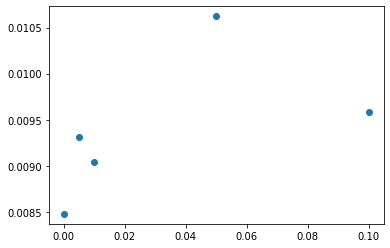

In [173]:
N = 50
A = 100
epss=[0.1,0.05,0.01,0.005,0.0001]
cond_es=[]
for eps in epss:
  c=0
  for i in range(A):
    M = generate_matrix(N,N)
    f = np.ones(N)
    f_per = generate_perturbation(1,N,eps)
    x = gauss(M,f)
    x_per = gauss(M,f_per)
    cond = condition_number(M) #вычисленное число обусловленности
    c += L2_vec(x_per)/L2_vec(x)*L2_vec(f)/L2_vec(f_per)/cond #отношение нижней оценки числа обусловленности к числу обусловленности
  cond_es.append(c/A) #среднее отношение
plt.scatter(epss, cond_es)
plt.show()

Как видно, в среднем нижняя оценка числа обусловленности меньше в 1000 раз числа обусловленности при различных eps.